# 决策树

水文水资源种常常用到各类分类或回归的及其学习算法，本文简单整理下决策树及其相关算法，包括集成学习树，随机森林等。

首先看看使用决策树作为预测模型来预测样本的类标。这种决策树也称作分类树（如果是用作回归，就是回归树）。

## CART决策树算法

在数据挖掘中，决策树主要有两种类型:

- 分类树 的输出是样本的类标。 
- 回归树 的输出是一个实数 (例如房子的价格，病人呆在医院的时间等)。

通常决策树主要有三种实现，分别是ID3算法，CART算法和C4.5算法。 本文以CART为例记录。

本节主要参考：

1. [维基百科](https://zh.wikipedia.org/wiki/%E5%86%B3%E7%AD%96%E6%A0%91%E5%AD%A6%E4%B9%A0)
2. [数据挖掘十大经典算法--CART: 分类与回归树](https://wizardforcel.gitbooks.io/dm-algo-top10/content/cart.html)
3. [CART算法](https://zhuanlan.zhihu.com/p/32003259)
4. [机器学习之分类与回归树(CART)](https://zhuanlan.zhihu.com/p/36108972)
5. [分类回归树CART(上)](https://www.cnblogs.com/zhangchaoyang/articles/2709922.html)
6. [决策树](https://github.com/Vay-keen/Machine-learning-learning-notes/blob/master/%E5%91%A8%E5%BF%97%E5%8D%8E%E3%80%8AMachine%20Learning%E3%80%8B%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0(5)--%E5%86%B3%E7%AD%96%E6%A0%91.md)

### 基本概念

决策树是基于树结构来进行决策的，网上看到一个例子十分有趣。母亲想要给自己的女娃介绍一个男朋友，于是有了下面的对话：

  女儿：多大年纪了？
  母亲：26。
  女儿：长的帅不帅？
  母亲：挺帅的。
  女儿：收入高不？
  母亲：不算很高，中等情况。
  女儿：是公务员不？
  母亲：是，在税务局上班呢。
  女儿：那好，我去见见。

该过程就是一个典型的决策树（在树的结构里， 叶子节点给出类标而内部节点代表某个属性），即相当于**通过年龄、长相、收入和是否公务员**将男童鞋分为**两个类别**：见和不见。

![example](68747470733a2f2f692e6c6f6c692e6e65742f323031382f31302f31372f356263373238656338346137372e706e67.png)

决策过程的每次判定都是对某一属性的“测试”。那么也可知决策树包含：一个根节点、若干个内部节点和若干个叶子节点，易知：

* **每个非叶节点表示一个特征属性**测试。
* 每个分支代表这个特征属性在某个值域上的输出。
* **每个叶子节点存放一个类别**。
* 每个节点包含的样本集合通过属性测试被划分到子节点中，根节点包含样本全集。

结合上图很容易理解，简单概括下，就是根节点是所有样本，然后沿着分支，会根据分支上的某个属性在某个值域上的输出将样本进行分类，然后依次进行到最后的叶节点，就完成了分类过程。

术语分类和回归树Classification And Regression Tree (CART) 是决策树的一种实现。CART算法是一种二分递归分割技术，把当前样本划分为两个子样本，使得生成的每个非叶子结点都有两个分支，因此CART算法生成的决策树是结构简洁的二叉树。由于CART算法构成的是一个二叉树，它在每一步的决策时只能是“是”或者“否”，即非叶子节点的特征取值为True和False，左分支取值为True，右分支取值为False，即使一个feature有多个取值，也是把数据分为两部分。CART可以处理连续型变量和离散型变量，利用训练数据递归的划分特征空间进行建树，用验证数据进行剪枝。

- 如果待预测分类是离散型数据，则CART生成分类决策树。
- 如果待预测分类是连续性数据，则CART生成回归决策树。

在CART算法中主要分为两个步骤

1. 将样本递归划分进行建树过程
2. 用验证数据进行剪枝

### 构造

注意构造决策树的输入有两个集合，一个是训练集，一个是属性集。结合前面的例子，就是一个女生已经相亲过有很多男生，这些男生就是训练集，而属性集是女生自己定的条件。构造决策树的动机可以理解成现在有一个新的男生，他想根据这个女生之前对男生的分类来判断自己有没有可能在她的yes中。那现在这个男生就需要构造一个决策树来分析了。决策树的构造是一个递归的过程，如图所示：
![train](68747470733a2f2f692e6c6f6c692e6e65742f323031382f31302f31372f356263373238656363323766652e706e67.png)

结合例子，就是之前全部男生都被女生排除了，那就是全部都是no；如果女生根本就没有选，只是不想相亲，那么就没有属性，全部no，那就只能将所有哥们直接标记成no了；接着是比较正常的情况，对这个女生分析，要分析哪个是最优划分属性，收入还是外貌等等，然后对这个属性的每个取值，生成一个分支，选出各个男生里面符合这个条件的，如果没有符合这个条件的，比如年薪百万的没有，那这些哥们被no的原因就是这个了，全部分到no就完事了；如果还真有，那这个就是yes了，那可能有其他原因被no，就对这几个百万哥继续分，用除了年薪这个属性之外的属性去分，递归重复类似的过程，一直到所有哥们都被分完。

那么可以想象，为什么是先考虑收入，而不是才华呢？你怎么就知道那个妹子不是喜欢有才华的呢？也就是说构造决策树的依据是什么呢？而这就是决策树学习的关键，关键在于**如何选择划分属性**，**不同的划分属性得出不同的分支结构**，从而影响整颗决策树的性能。属性划分的目标是让各个划分出来的**子节点尽可能地“纯”，即属于同一类别**。

接下来就以CART算法为例稍微叙述下。CART算法构建决策树时在每一步选择一个最好的属性来分裂。CART决策树使用**“基尼指数”（Gini index）**来选择划分属性，基尼指数反映的是从样本集D中随机抽取两个样本，其类别标记不一致的概率，因此Gini(D)越小越好。
$$Gini(D)=\sum _{k=1}^{|y|}\sum _{k'\neq k}p_k p_{k'}=1-\sum _{k=1}^{|y|}p_k^2$$
使用某个属性a划分后的基尼指数为：
$$Gini\_index(D,a)=\sum _{v=1}^{V}\frac{|D^v|}{|D|}Gini(D^v)$$
选择基尼指数最小的划分属性。

### 剪枝处理

从决策树的构造流程中我们可以直观地看出：不管怎么样的训练集，决策树总是能很好地将各个类别分离开来，这时就会遇到之前提到过的问题：过拟合（overfitting），即太依赖于训练样本。剪枝（pruning）则是决策树算法对付过拟合的主要手段。这里暂不赘述了。

### 连续值与缺失值处理

对于连续值的属性，每个取值作为一个分支显然不可行，因此需要进行离散化处理，常用的方法为二分法，基本思想为：给定样本集D与连续属性α，二分法试图找到一个划分点t将样本集D在属性α上分为≤t与＞t。

* 首先将α的所有取值按升序排列，所有相邻属性的均值作为候选划分点（n-1个，n为α所有的取值数目）。
* 计算每一个划分点划分集合D（即划分为两个分支）后的信息增益。
* 选择最大信息增益的划分点作为最优划分点。

$$Gain(D,a)=max_{t\in T_a}\ Gain(D,a,t)=max_{t\in T_a}\ Ent(D)-\sum _{\lambda \in {-,+}}\frac{|D_t^v|}{|D|}Ent(D_t^{\lambda})$$

In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf.predict([[2., 2.]])

array([1])

## 回归树

前面虽然提到了CART可以用到回归，不过没细说，这里最后补充点关于回归树的内容。本节主要参考了：

1. [机器学习笔记十二：分类与回归树CART](https://blog.csdn.net/xierhacker/article/details/64439601)
2. [Regression Tree 回归树](https://blog.csdn.net/weixin_40604987/article/details/79296427)

设有数据集D，X和Y分别代表输入和输出变量，其中Y是连续变量（回归模型），包含m个样本的数据集D可以表示为$D=\{(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\cdots,(x^{(m)},y^{(m)})\}$

一个回归树的本质代表着**一个被划分的输入空间**和**这些划分单元上面各自的输出值**。

比如，一个回归树能够将一个输出空间划分为K个部分$R_1,R_2,\cdots,R_K$，并且在每个部分$R_K$上面有一个固定的输出值$c_k$，那么回归树模型可以表示为：
$$f(x)=\sum_{k=1}^K c_kI(x\in R_k)$$
也就是说，只要模型正确的建立起来，只要知道输入向量属于哪个部分，就可以得到它的值了，上式中I()指指示函数。

比如一组数据：

1 12 31

2 13 32

3 14 33

4 15 34

5 16 35

每一列是一个特征，比如以第一列，特征0，来分类，大于2的称为一类，这就划分了。

然后以特征1分类，比如大于14的一类。

所以CART回归和分类类似，训练的时候需要知道什么是切分变量和切分点，切分就是指分割输入空间的意思。切分比哪里就是切分特征，即在某个特征上面进行选择，切分点就是一个值，这个值一个集合分成两边，切分特征和切分点共同决定一个集合应该以怎么样的方式来切分。CART回归非常重要的就是寻找最优切分特征和最优切分点。优化函数的目标如下式所示：
$$\sum_{x^{(i)}\in R_k}(y^{(i)}-f(x^{(i)}))^2$$
以上例来分析，遍历所有输入变量来找最优切分特征j和最优切分点s，即：
$$min_{j,s}[min_{c_1} \sum_{x^{(i)}\in R_1(j,s)}(y^{(i)}-c_1)^2 + min_{c_2} \sum_{x^{(i)}\in R_2(j,s)}(y^{(i)}-c_2)^2]$$
通常认为一个区域上面的结果为该区域对应所有输出的均值，即
$$\widehat{c_m}=mean(y|x\in R_m)$$
也就是说，对于上面找最优切分点的时候，$c_1,c_2$可以替换成该区域上面的所有输出的均值。因为是决策树，CART还是二分树，所以多维自变量切分的时候就是每次对各个自变量依次切分，然后找到最优的切分变量和切分点。

找到最优切分(j,s)之后，切分就能将集合切分成总损失最小的两个部分。对于切分出来的区域再重复递归这样的划分过程，直到满足条件为止，那么就生成了一棵回归树。

个人感觉回归树有点像是打着回归的旗号实施分类的方法。具体看个例子，以一个变量的情况为例，看下面的数据，目标是得到一棵最小二乘回归树。

|x	|1	|2	|3	|4	|5	|6	|7	|8	|9	|10|
|-|-|-|-|-|-|-|-|-|-|-|
|y	|5.56|5.7|	5.91|	6.4|	6.8|	7.05|	8.9|	8.7|	9|	9.05|

1.选择最优切分变量j与最优切分点s

在本数据集中，只有一个变量，因此最优切分变量自然是x。接下来我们考虑9个切分点[1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]

损失函数定义为平方损失函数 $Loss(y,f(x))=(f(x)−y)^2$，将上述9个切分点**依次**代入下面的公式
$$min_{j,s}[min_{c_1} \sum_{x^{(i)}\in R_1(j,s)}Loss(y_i,c_1) + min_{c_2} \sum_{x^{(i)}\in R_2(j,s)}Loss(y_i,c_2)$$
其中 $c_m=ave(y_i|x_i\in Rm)$

例如，取 s=1.5。此时 $R_1$={1},$R_2$={2,3,4,5,6,7,8,9,10}，这两个区域的输出值分别为：
$c_1$=5.56,$c_2$=(5.7+5.91+6.4+6.8+7.05+8.9+8.7+9+9.05)/9=7.50。对应地可以计算出s取其他值时候的情况，可以得到下表：

|s	|1.5	|2.5	|3.5	|4.5	|5.5	|6.5	|7.5	|8.5	|9.5|
|-|-|-|-|-|-|-|-|-|-|
|$c_1$	|5.56	|5.63	|5.72	|5.89	|6.07	|6.24	|6.62	|6.88	|7.11|
|$c_2$	|7.5	|7.73	|7.99	|8.25	|8.54	|8.91	|8.92	|9.03	|9.05|

把$c_1,c_2$的值代入计算损失，如：$m(1.5)=(5.56-5.56)^2+(5.7-7.5)^2+(5.91-7.5)^2+(6.4-7.5)^2+(6.8-7.5)^2+(7.05-7.5)^2+(8.9-7.5)^2+(8.7-7.5)^2+(9-7.5)^2+(9.05-7.5)^2 = 15.723099999999999$。

计算各个划分点对应的m，可获得下表：

|s	|1.5	|2.5	|3.5	|4.5	|5.5	|6.5	|7.5	|8.5	|9.5|
|-|-|-|-|-|-|-|-|-|-|
|m(s)	|15.72	|12.07	|8.36	|5.78	|3.91	|1.93	|8.01	|11.73	|15.74|

显然取 s=6.5时，m(s)最小。因此，第一个划分变量j=x，对应s=6.5

用选定的(j,s)划分区域，并决定输出值

两个区域分别是：$R_1$={1,2,3,4,5,6},$R_2$={7,8,9,10}，输出值$c_m=ave(y_i|x_i\in Rm),c_1=6.24,c_2=8.91$

然后对两个划分好的区域继续划分，比如对$R_1$划分：

|x	|1	|2	|3	|4	|5	|6|
|-|-|-|-|-|-|-|
|y	|5.56	|5.7	|5.91	|6.4	|6.8	|7.05|

取切分点[1.5,2.5,3.5,4.5,5.5]，则各区域的输出值c如下表：

|s	|1.5	|2.5	|3.5	|4.5	|5.5|
|-|-|-|-|-|-|
|c1	|5.56	|5.63	|5.72	|5.89	|6.07|
|c2	|6.37	|6.54	|6.75	|6.93	|7.05|

计算m(s)：

|s	|1.5	|2.5	|3.5	|4.5	|5.5|
|-|-|-|-|-|-|
|m(s)	|1.3087	|0.754	|0.2771	|0.4368	|1.0644|

s=3.5时m(s)最小。同理对$R_2$划分，然后再依次进行下去直到达到划分结束条件。

比如假设在生成3个区域之后停止划分，那么最终生成的回归树形式如下：
$T=\left\{\begin{matrix}
5.72 & x\leqslant 3.5 \\ 
6.75 & 3.5\leqslant x \leqslant 6.5\\ 
8.91 & 6.5< x
\end{matrix}\right.
$

下面是具体的代码实践：

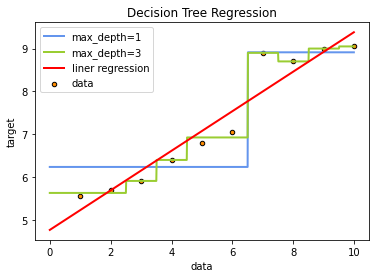

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([5.56, 5.70, 5.91, 6.40, 6.80, 7.05, 8.90, 8.70, 9.00, 9.05]).ravel()

# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## 模型树

决策树可用于聚类（类别变量），也可用于数值预测，当用于数值预测时可以分为回归树和模型树，上节简单记录了回归树的内容，这里就补充下模型树的基本概念。本节主要参考了：

1. [回归树与模型树](https://zsccy.xyz/post/2017-02-18-tree-model/)

在回归树中并没用使用线性回归的方法，而是基于到达叶节点的案例的平均值做出预测。

模型树和回归树以大致相同的方式生长，但是在每个叶节点，根据**到达该节点的案例建立多元线性回归模型**。根据叶节点的数目，一棵模型树可能会建立几十甚至上百个这样的模型，可能会使**模型树比同等的回归树更难解释**，但好处也行**能提高精确度**。

用于数值预测的决策树的建立方式与用于分类的决策树建立的方式大致相同。从根节点开始，按照特征使用分而治之的决策对数据进行划分，在进行一次分割后，将会导致结果最大化的均匀增长。在分类决策树中，一致性(均匀性)是有熵值度量 ，对于数值型决策，一致性(均匀性)可通过统计量(方差、标准差、平均绝对偏差)来度量,根据使用的决策树生长算法，度量方法可能用所不同，但基本原理相同。常见的一个分割标准成为标准偏差减少(Standard Deciation Reduction,SDR),其公式定义如下：
$$SDR=sd(T)$$

## Bagging

针对决策树算法，可以通过模型融合大大提高其精确度。一个决策树是弱的，整合多个弱模型能够构造一个强的模型，三个臭皮匠顶个诸葛亮。本节就简单记录下集成学习决策树相关的内容。

主要参考：

1. [【机器学习】决策树及Bagging, Random Forest和Boosting模型融合](https://blog.csdn.net/AmourDeMai/article/details/51457406)
2. [Vay-keen/Machine-learning-learning-notes/周志华《Machine Learning》学习笔记(10)--集成学习.md](https://github.com/Vay-keen/Machine-learning-learning-notes/blob/master/%E5%91%A8%E5%BF%97%E5%8D%8E%E3%80%8AMachine%20Learning%E3%80%8B%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0(10)--%E9%9B%86%E6%88%90%E5%AD%A6%E4%B9%A0.md)
3. [Bagging算法](https://zh.wikipedia.org/wiki/Bagging%E7%AE%97%E6%B3%95)

集成学习（ensemble learning）指的是将多个学习器进行有效地结合，组建一个“学习器委员会”，其中每个学习器担任委员会成员并行使投票表决权，使得委员会最后的决定更能更优，即其泛化性能要能优于其中任何一个学习器。

集成学习的基本结构为：先产生一组个体学习器，再使用某种策略将它们结合在一起。

![集成学习](68747470733a2f2f692e6c6f6c692e6e65742f323031382f31302f31382f356263383464306331353638332e706e67.png)

若个体学习器都属于同一类别，例如都是决策树或都是神经网络，则称该集成为同质的（homogeneous）;若个体学习器包含多种类型的学习算法，例如既有决策树又有神经网络，则称该集成为异质的（heterogenous）。同质集成：个体学习器称为“基学习器”（base learner），对应的学习算法为“基学习算法”（base learning algorithm）。 异质集成：个体学习器称为“组件学习器”（component learner）或直称为“个体学习器”。

虽说团结力量大但也有木桶短板理论调皮捣蛋，那如何做到呢？这就引出了集成学习的两个重要概念：准确性和多样性（diversity）。准确性指的是个体学习器不能太差，要有一定的准确度；多样性则是个体学习器之间的输出要具有差异性。**产生“好而不同”的个体学习器**正是集成学习研究的核心。

比如考虑二分类的简单情形，假设基分类器(输出为$h_i (x)$)之间相互独立（能提供较高的差异度），且错误率相等为 ε，则可以将集成器的预测H(x)看做一个伯努利实验，易知当所有基分类器中不足一半预测正确的情况下，集成器预测错误，所以集成器的错误率可以计算为：
$$H(x)=sign(\sum _{T}^{i=1}h_i(x))$$
$$P(H(x)\neq f(x))=\sum _{k=0}^{\lfloor T/2\rfloor}C_T^k (1-\epsilon)^k\epsilon ^{T-k}\le exp(-\frac1 2 T(1-2\epsilon)^2)$$

此时，集成器错误率随着基分类器的个数的增加呈指数下降，但前提是基分类器之间相互独立，在实际情形中显然是不可能的，假设训练有A和B两个分类器，对于某个测试样本，显然满足：P（A=1 | B=1）> P（A=1），因为A和B为了解决相同的问题而训练，因此在预测新样本时存在着很大的联系。因此，个体学习器的“准确性”和“差异性”本身就是一对矛盾的变量，准确性高意味着牺牲多样性，所以产生“好而不同”的个体学习器正是集成学习研究的核心。现阶段有三种主流的集成学习方法：Boosting、Bagging以及随机森林（Random Forest），接下来根据实际应用中遇到的情况逐渐补充记录。

本节先关注Bagging算法。Bagging与后面记录的Random Forest的基本思（tao）想（lu）都是通过“**自助采样**”的方法来增加多样性。

Bagging算法全称为bootstrap aggregating，引导聚集算法，Bagging是一种并行式的集成学习方法，即**基学习器的训练**之间没有前后顺序可以**同时进行**，Bagging使用“有放回”采样的方式选取训练集，对于包含m个样本的训练集，进行m次有放回的**随机采样**操作，从而得到m个样本的采样集，这样训练集中有接近36.8%的样本没有被采到（见下式）。按照相同的方式重复进行，我们就可以采集到T个包含m个样本的数据集，从而训练出T个基学习器，**最终对这T个基学习器的输出进行结合**，比如通过取平均值、取多数票等方法，即可得到Bagging的结果。。
$$\lim_{m\to\infty}(1-\frac 1 m)^m = \frac 1 e \simeq 0.368$$
Bagging算法的流程如下所示：

![](68747470733a2f2f692e6c6f6c692e6e65742f323031382f31302f31382f356263383464306430653736312e706e67.png)

Bagging主要通过样本的扰动来增加基学习器之间的多样性，因此Bagging的基学习器应为那些对训练集十分敏感的不稳定学习算法，例如：神经网络与决策树等。从偏差-方差分解来看，Bagging算法主要关注于**降低方差，即通过多次重复训练提高稳定性**。不同于AdaBoost的是，Bagging可以十分简单地移植到多分类、回归等问题。总的说起来则是：AdaBoost关注于降低偏差，而Bagging关注于降低方差。

## Random Forest简介

随机森林是水文统计分析中常用的一种分类或回归算法，因此有必要了解其基本原理，以顺利读懂相关文献。

本文主要参考：

1. [说说随机森林](https://zhuanlan.zhihu.com/p/22097796)
2. [周志华《Machine Learning》学习笔记(10)--集成学习](https://github.com/Vay-keen/Machine-learning-learning-notes/blob/master/%E5%91%A8%E5%BF%97%E5%8D%8E%E3%80%8AMachine%20Learning%E3%80%8B%E5%AD%A6%E4%B9%A0%E7%AC%94%E8%AE%B0(10)--%E9%9B%86%E6%88%90%E5%AD%A6%E4%B9%A0.md)
3. [理解随机森林：基于Python的实现和解释](https://www.jiqizhixin.com/articles/2018-12-22-3)
4. [Random Forest Tutorial.ipynb](https://github.com/TryEnlight/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb)
5. [随机森林回归 sklearn.ensemble.RandomForestRegressor](https://blog.csdn.net/GitzLiu/article/details/81952712)
6. [从零实现回归随机森林](https://zhuanlan.zhihu.com/p/52052903)
7. [利用随机森林对特征重要性进行评估](https://blog.csdn.net/zjuPeco/article/details/77371645)

### 基本概念

随机森林顾名思义，是用随机的方式建立一个森林，森林里面有很多的决策树组成，随机森林的每一棵决策树之间是没有关联的。

决策树实际上是将空间用超平面进行划分的一种方法，每次分割的时候，都将当前的空间一分为二（图来自参考1）。

![DT](fbed6853d3c557892dc735960eb7f56e_hd.png)

![sample_space](bd9d3fe215ad812ddd3ca7133251b38a_hd.png)

决策树代码示例如下：

Decision tree has 9 nodes with maximum depth 3.
Model Accuracy: 1.0


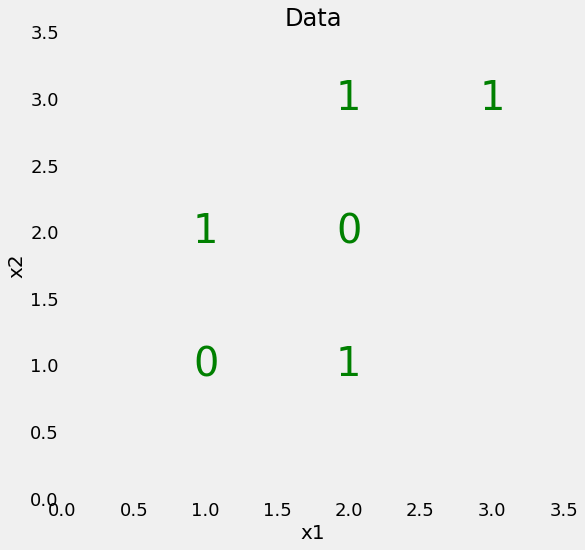

In [4]:
import numpy as np
import pandas as pd

# Set random seed to ensure reproducible runs
RSEED = 50

X = np.array([[2, 2], 
              [2, 1],
              [2, 3], 
              [1, 2], 
              [1, 1],
              [3, 3]])

y = np.array([0, 1, 1, 1, 0, 1])

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.figure(figsize = (8, 8))

# Plot each point as the label
for x1, x2, label in zip(X[:, 0], X[:, 1], y):
    plt.text(x1, x2, str(label), fontsize = 40, color = 'g',
             ha='center', va='center')
    
# Plot formatting
plt.grid(None);
plt.xlim((0, 3.5));
plt.ylim((0, 3.5));
plt.xlabel('x1', size = 20); plt.ylabel('x2', size = 20); plt.title('Data', size = 24)

from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)


print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')
print(f'Model Accuracy: {tree.score(X, y)}')

在得到森林之后，当有**一个新的输入样本进入**的时候，就让森林中的**每一棵决策树分别进行一下判断**，看看这个样本应该属于哪一类（对于分类算法），然后**看看哪一类被选择最多**，就预测这个样本为那一类。

随机森林可以既可以处理属性为离散值的量，比如ID3算法，也可以处理属性为连续值的量，比如C4.5算法。另外，随机森林还可以用来进行无监督学习聚类和异常点检测。

随机森林实际上也属于“集成学习”的范畴。

本节只讨论RF，其余的如Boosting和Bagging等

### 算法内容

RF的基本思（tao）想（lu）是通过“自助采样”的方法来增加多样性。它的基学习器固定为决策树，多棵树也就组成了森林，而“随机”则在于**选择划分属性的随机**，随机森林在训练基学习器时，也采用**有放回采样的方式添加样本扰动**，同时它还**引入了一种属性扰动**，即在基决策树的训练过程中，**在选择划分属性时，RF先从候选属性集中随机挑选出一个包含K个属性的子集，再从这个子集中选择最优划分属性**，一般推荐K=log2（d）。

这样随机森林中基学习器的多样性不仅来自样本扰动，还来自属性扰动，从而进一步提升了基学习器之间的差异度。随机森林的**起始性能较差**（由于属性扰动，基决策树的准确度有所下降），但随着基学习器数目的增多，随机森林往往**会收敛到更低的泛化误差**。

#### 随机采样

随机森林的一大关键是每个树都在随机的数据点样本上进行训练。这些样本是可重复地抽取出来的（称为 bootstrapping），也就是说某些样本会多次用于单个树的训练（如果有需要，也可以禁止这种做法）。其思路是，**通过在不同样本上训练每个树，尽管每个树依据训练数据的某个特定子集而可能有较高方差，但整体而言整个森林的方差会很低**。这种在数据的不同子集上训练每个单个学习器然后再求预测结果的平均的流程被称为 bagging，这是 bootstrap aggregating 的缩写。

#### 特征的随机子集

随机森林背后的另一个概念是：**在每个决策树中，分割每个节点时都只会考虑所有特征中的一个子集**。通常设定为 sqrt(n_features)，意思是在每个节点，决策树会基于一部分特征来考虑分割，这部分特征的数量为总特征数量的平方根。随机森林也可以在每个节点考虑所有特征来进行训练。（在 Scikit-Learn 随机森林实现中，这些选项是可调控的。）

如果你理解了单个决策树、bagging 决策树、特征的随机子集，那你就可以很好地理解随机森林的工作方式了。随机森林组合了数百或数千个决策树，并会在稍有不同的观察集上训练每个决策树（数据点是可重复地抽取出来的），并且会根据限定数量的特征分割每个树中的节点。随机森林的最终预测结果是每个单个树的预测结果的平均。

In [5]:
from sklearn.ensemble import RandomForestRegressor
 
data=[[0,0,0],[1,1,1],[2,2,2]]
 
target=[0,1,2]
 
rfr=RandomForestRegressor()
 
rfr.fit(data,target)   #训练数据
 
print(rfr.predict([[1,1,1]]))    #预测数据

print(rfr.predict([[1,1,1],[2,2,2]]))

[0.87]
[0.87 1.6 ]


### 特征重要性

现实情况下，一个数据集中往往有成百上前个特征，如何在其中选择比结果影响最大的那几个特征，以此来缩减建立模型时的特征数是我们比较关心的问题。这样的方法其实很多，比如主成分分析PCA（可见本文件夹下另一篇记录），lasso等等。不过，这里只简单介绍用随机森林来对进行特征筛选。

feature importance,特征的重要性表示**特征对预测结果影响程度**，某一特征重要性越大，表明该特征对预测结果的影响越大，重要性越小，表明该特征对预测结果越小。RFR中某一特征的重要性，是**该特征在内部所有决策树重要性的平均值**，说白了就是看看每个特征在随机森林中的每颗树上做了多大的贡献，然后取个平均值，最后比一比特征之间的贡献大小。

那么这个贡献是怎么一个说法呢？通常可以用基尼指数（Gini index）或者袋外数据（OOB）错误率作为评价指标来衡量。

在决策树中，计算某一个特征的重要性有多种方法，sklearn内部采用的方法如下：

某一节点 k 的重要性为
$$n_k=\omega_k*G_k-\omega_{left}*G_{left}-\omega_{right}*G_{right}$$

其中，$\omega_k,\omega_{left},\omega_{right}$分别为**节点k以及其左右子节点中训练样本个数与总训练样本数目的比例**， $G_k,G_{left},G_{right}$分为**节点 k以及其左右子节点的不纯度**。知道每一个节点的重要性之后，即可通过公式得出某一feature的重要性:
$$f_i=\frac{\sum_{j\in nodes\ split\ on\ feature\ i}n_j}{\sum_{k\in\ all\ nodes}n_k}$$

In [ ]:
import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header = None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
              'Alcalinity of ash', 'Magnesium', 'Total phenols', 
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

import numpy as np
np.unique(df['Class label'])

df.info()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
feat_labels = df.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli